&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&ensp;
[Home Page](../Start_Here.ipynb)


[Previous Notebook](Manipulation_of_Image_Data_and_Category_Determination_using_Text_Data.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[1](The_Problem_Statement.ipynb)
[2](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
[3](Manipulation_of_Image_Data_and_Category_Determination_using_Text_Data.ipynb)
[4](Countering_Data_Imbalance.ipynb)
[5]
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;


# Competition :

In this exercise participant need to tune and work on improving overall acuracy of our model. 

To help you get started by pointing out some obvious ways in which you can make the model more efficient. 

- Epochs  
- Batch Size 
- Optimizers : We have used SGD as a optimizer. Participant can try applying other optimizer and test to obtain quick convergence.
- Data Augmentation : Remember, we mentioned we have an imbalanced dataset. You could try differnet augmentation techniques for the minority classes.
- Model : If you have exploited all the bbove methods to improve your model, you can change the model by adding more Layers to it and see if that improves that accuracy.

Note, before you start tweaking and training your model ,it would be worthwhile to refer to these to see how they affect your model : 

[Epochs impact on Overfitting](https://datascience.stackexchange.com/questions/27561/can-the-number-of-epochs-influence-overfitting ) 


[Effect of Batch Size on Training Dynamics](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e)

[Introduction to Optimizers](https://algorithmia.com/blog/introduction-to-optimizers)

# Training the Model with Data Augmentation : 


We created a new function called `augmentation(name,category,filenames,labels,i)` and here you can add more samples to Category which have imbalanced data.  

In [1]:
import sys
sys.path.append('/workspace/python/source_code')

from utils import * 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

def augmentation(name,category,filenames,labels,i):
    # Important Constants
    file_path = "Dataset/Aug/"
    images = []
    (h, w) = (232,232)
    center = (w / 2, h / 2)
    angle90 = 90
    angle180 = 180
    angle270 = 270
    scale = 1.0
    img = load_image(name , interpolation = cv2.INTER_LINEAR)
    
    ## ~~ Add Augmentations here  ~~
    if category == 0 :
        images.append(cv2.flip(img,0))
    elif category == 1 :
        pass
    elif category == 2 :
        pass
    elif category == 3 :
        pass
    elif category == 4 :
        pass
    elif category == 5 :
        pass
    elif category == 6 :
        pass
    elif category == 7 :
        images.append(cv2.flip(img,0))
        
    ## ~~ Augmentation ends here ~~
    for j in range(len(images)):
        cv2.imwrite(file_path+str(i+j)+'.jpeg',images[j])
        filenames.append(file_path+str(i+j)+'.jpeg')
        labels.append(category)
    i = i + len(images)
    return i

##### We pass this function to our `load_dataset()` function to generate these augmentations. 

Kindly wait for a couple of minutes while it takes to augment the images.

In [2]:
filenames,labels = load_dataset(augment_fn = augmentation)

................................
28574


In [3]:
# Set the Size of the Validation set
val_filenames , val_labels = make_test_set(filenames,labels,val=0.1)

[357, 357, 357, 357, 357, 357, 357, 357]
Counter({2: 7923, 3: 5326, 1: 3790, 4: 2921, 5: 2323, 6: 2165, 7: 739, 0: 531})


In [4]:
#Make train test set 
test = 0.1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filenames, labels, test_size=test, random_state=1)

In [5]:
import tensorflow as tf
y_train = tf.one_hot(y_train,depth=8)
y_test = tf.one_hot(y_test,depth=8)
val_labels = tf.one_hot(val_labels,depth=8)

In [6]:
# Make Dataset compatible with Tensorflow Data Pipelining.

# ~~ Change the batch Size here ~~
batch_size = 64
# ~~ Change the batch Size here ~~

train,test,val = make_dataset((x_train,y_train,batch_size),(x_test,y_test,32),(val_filenames,val_labels,32))

# Model Architecture :



In [7]:
import numpy as np
np.random.seed(1337)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten ,Dropout, MaxPooling2D
from tensorflow.keras import backend as K 

#Reset Graphs and Create Sequential model

K.clear_session()
model = Sequential()

## ~~ Change Model or Parameters Here
#Convolution Layers

model.add(Conv2D(64, kernel_size=10,strides=3, activation='relu', input_shape=(232,232,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(256, kernel_size=5,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(288, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(272, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Dropout(0.5))
model.add(Flatten())

#Linear Layers 

model.add(Dense(3584,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(8, activation='softmax'))


## ~~ Change Model or Parameters Here

# Print Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 256)       409856    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 288)       663840    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 288)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 272)       7

In [8]:
import functools

#Define Number of Epochs

## ~~ Change Number of Epochs Here ~~
epochs = 24
## ~~ Change Number of Epochs Here ~~


# Include Top-2 Accuracy Metrics 
top2_acc = functools.partial(tensorflow.keras.metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top2_acc'


## ~~ Change Optimizer or Parameters Here
# Optimizer
sgd = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
## ~~ Change Optimizer or Parameters Here

#Compile Model with Loss Function , Optimizer and Metrics
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, 
              optimizer=sgd,
              metrics=['accuracy',top2_acc])

# Train the Model 
trained_model = model.fit(train,
          epochs=epochs,
          verbose=1,
          validation_data=val)

# Test Model Aganist Validation Set
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/24
362/362 [==============================] - 577s 2s/step - loss: 1.8228 - accuracy: 0.3074 - top2_acc: 0.5146 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_top2_acc: 0.0000e+00
Epoch 2/24
362/362 [==============================] - 381s 1s/step - loss: 1.5392 - accuracy: 0.3852 - top2_acc: 0.6414 - val_loss: 1.7288 - val_accuracy: 0.3326 - val_top2_acc: 0.5196
Epoch 3/24
362/362 [==============================] - 383s 1s/step - loss: 1.3738 - accuracy: 0.4431 - top2_acc: 0.6983 - val_loss: 1.3537 - val_accuracy: 0.4618 - val_top2_acc: 0.6828
Epoch 4/24
362/362 [==============================] - 283s 780ms/step - loss: 1.2274 - accuracy: 0.5094 - top2_acc: 0.7546 - val_loss: 1.1414 - val_accuracy: 0.5529 - val_top2_acc: 0.7707
Epoch 5/24
362/362 [==============================] - 206s 570ms/step - loss: 1.0976 - accuracy: 0.5667 - top2_acc: 0.7956 - val_loss: 1.0498 - val_accuracy: 0.5991 - val_top2_acc: 0.8011
Epoch 6/24
362/362 [==============================] - 111

### Visualisations

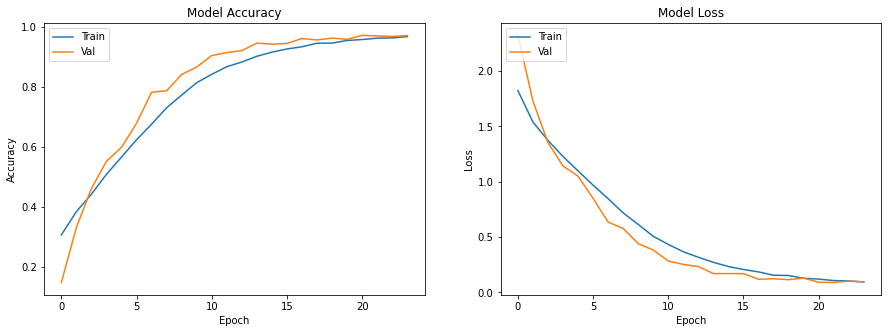

In [9]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(trained_model.history['accuracy'])
ax.plot(trained_model.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Val'])

ax2 = f.add_subplot(122)
ax2.plot(trained_model.history['loss'])
ax2.plot(trained_model.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'],loc= 'upper left')

plt.show()

<AxesSubplot:>

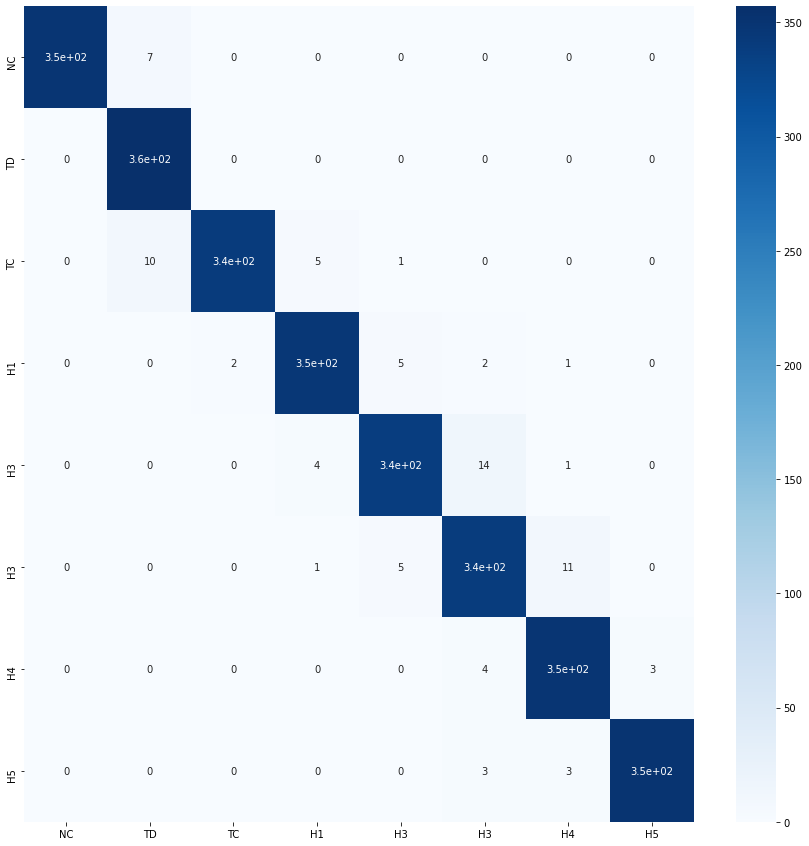

In [10]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

#Plotting a heatmap using the confusion matrix
pred = model.predict(val)
p = np.argmax(pred, axis=1)
y_valid = np.argmax(val_labels, axis=1, out=None)
results = confusion_matrix(y_valid, p) 
classes=['NC','TD','TC','H1','H3','H3','H4','H5']
df_cm = pd.DataFrame(results, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (15,15))

sn.heatmap(df_cm, annot=True, cmap="Blues")

Let us now save our Model and the trained Weights for Future usage :

In [ ]:
#Save Our Model 
model.save('cyc_pred_comp.h5')

[Previous Notebook](Manipulation_of_Image_Data_and_Category_Determination_using_Text_Data.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[1](The_Problem_Statement.ipynb)
[2](Approach_to_the_Problem_&_Inspecting_and_Cleaning_the_Required_Data.ipynb)
[3](Manipulation_of_Image_Data_and_Category_Determination_using_Text_Data.ipynb)
[4](Countering_Data_Imbalance.ipynb)
[5]
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;

&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&ensp;
[Home Page](../Start_Here.ipynb)
